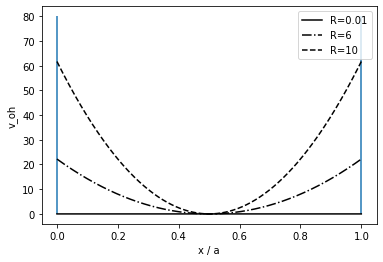

In [2]:
#A1
import numpy as np
import matplotlib.pyplot as plt
global a
a=1
def v_oh(R,x):
    return np.pi**2/4*R**2*(x/a-.5)**2
x=np.linspace(0,a,int(1e5))

plt.plot(x,v_oh(1e-2,x),color='k',label='R=0.01')
plt.plot(x,v_oh(6,x),'k-.',label='R=6')
plt.plot(x,v_oh(1e1,x),'k--',label='R=10')
plt.vlines(0,0,80)
plt.vlines(a,0,80)
plt.xlabel('x / a')
plt.ylabel('v_oh')
plt.legend()

In [3]:
#A2
import scipy
import numpy as np
from scipy.constants import hbar
from scipy.integrate import quad 
global R, om, a, m, N
R=24
a=1
m=1
om=1
eps=1e-8

N=50

E_n= lambda n : (n*np.pi*hbar/a)**2/(2*m)
v_oh= lambda x : (np.pi/2*R*(x/a-.5))**2
delta= lambda n,m : int(n==m)
intg= lambda n,m : quad(lambda x : v_oh(x)*np.sin(n*np.pi*x)*np.sin(m*np.pi*x),0,1)
H_nm= lambda n,m : n**2*delta(n,m)+2*intg(n,m)[0]

H=np.zeros((N,N))
for i in range(N):
    for j in range(N):
        H[i,j]=H_nm(i+1,j+1)

        
H[np.abs(H) < eps] = 0 #pour éviter les artéfacts de calcul qui devraient valoir 0
H=np.around(H,2)
print(H)



[[4.74400e+01 0.00000e+00 5.40000e+01 ... 0.00000e+00 1.00000e-02
  0.00000e+00]
 [0.00000e+00 1.04440e+02 0.00000e+00 ... 2.00000e-02 0.00000e+00
  2.00000e-02]
 [5.40000e+01 0.00000e+00 1.19440e+02 ... 0.00000e+00 3.00000e-02
  0.00000e+00]
 ...
 [0.00000e+00 2.00000e-02 0.00000e+00 ... 2.42240e+03 0.00000e+00
  7.19700e+01]
 [1.00000e-02 0.00000e+00 3.00000e-02 ... 0.00000e+00 2.51941e+03
  0.00000e+00]
 [0.00000e+00 2.00000e-02 0.00000e+00 ... 7.19700e+01 0.00000e+00
  2.61841e+03]]


Text(0, 0.5, 'eps(n)')

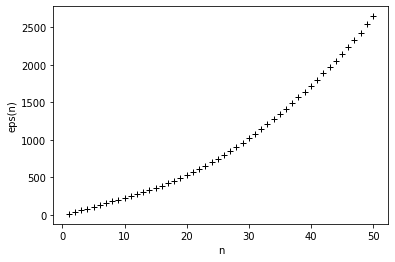

In [4]:
#A3
import numpy.linalg as alg
import matplotlib.pyplot as plt

spectre=np.array(sorted(alg.eig(H)[0]))
vec_eps=spectre/E_n(1)
vec_n=np.linspace(1,N,N)

plt.plot(vec_n,spectre,'k+')
plt.xlabel('n')
plt.ylabel('eps(n)')

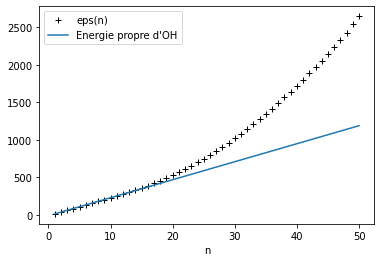

In [5]:
#A4
import numpy.linalg as alg
import matplotlib.pyplot as plt

spectre=np.array(sorted(alg.eig(H)[0]))
vec_eps=spectre/E_n(1)
vec_n=np.linspace(1,N,N)
vec_OH=R*np.linspace(.5,N-.5,N)
plt.plot(vec_n,spectre,'k+',label='eps(n)')
plt.plot(vec_n,vec_OH,label="Energie propre d'OH")

plt.xlabel('n')
plt.legend()

123.02806465508304

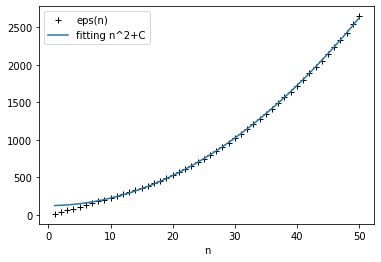

In [6]:
#A5
from scipy.optimize import curve_fit
C=curve_fit(lambda n,C:n**2+C,vec_n[20:],spectre[20:])[0][0]
fit=lambda n:n**2+C
vec_fit=[fit(n+1) for n in range(N)]
plt.plot(vec_n,spectre,'k+',label='eps(n)')
plt.plot(vec_n,vec_fit,label="fitting n^2+C")
plt.xlabel('n')
plt.legend()
C


In [7]:
#A6
def Psi(N,n_od): #n_od:ordre de l'état excité
    E_n= lambda n : (n*np.pi*hbar/a)**2/(2*m)
    v_oh= lambda x : (np.pi/2*R*(x/a-.5))**2
    delta= lambda n,m : int(n==m)
    intg= lambda n,m : quad(lambda x : v_oh(x)*np.sin(n*np.pi*x)*np.sin(m*np.pi*x),0,1)
    H_nm= lambda n,m : n**2*delta(n,m)+2*intg(n,m)[0]
    
    H=np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            H[i,j]=H_nm(i+1,j+1)
    
    phi= lambda n,x : np.sqrt(2/a)*np.sin(n*np.pi*x/a)
    
    [spectre,vecs_p]=alg.eig(H)
    #tri des vecteurs propres
    ordre=spectre.argsort()
    vecs_p=vecs_p[:,ordre]
    
    vec=vecs_p[:,n_od]
    
    def f(x):
        f_=0
        for i in range(N):
            f_+=vec[i]*phi(i+1,x)
        return f_ 
    
    return f

Text(0.5, 0, 'x')

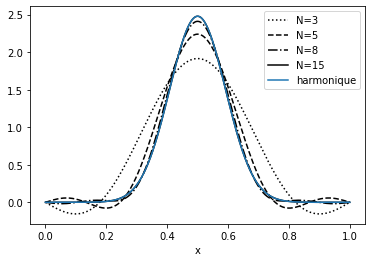

In [8]:
#A6.1
psi_oh_0= lambda x : (np.pi/(2*a**2)*R)**0.25*np.e**(-np.pi**2/4*R*(x/a-.5)**2)
vec_x=np.linspace(0,1,10000)
plt.plot(vec_x,-Psi(3,0)(vec_x),'k:',label='N=3')
plt.plot(vec_x,Psi(5,0)(vec_x),'k--',label='N=5')
plt.plot(vec_x,Psi(8,0)(vec_x),'k-.',label='N=8')
plt.plot(vec_x,-Psi(15,0)(vec_x),'k',label='N=15')
plt.plot(vec_x,psi_oh_0(vec_x),label='harmonique')
plt.legend()
plt.xlabel('x')

Text(0.5, 0, 'x')

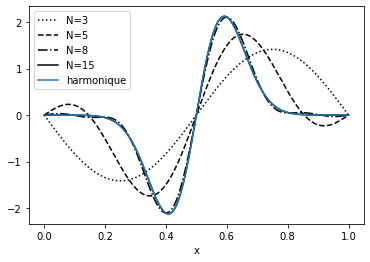

In [75]:
#A6.2
psi_oh_1= lambda x : (np.pi**5/(2*a**2)*R**3)**0.25*(x/a-.5)*np.e**(-np.pi**2/4*R*(x/a-.5)**2)
vec_x=np.linspace(0,1,10000)
plt.plot(vec_x,-Psi(3,1)(vec_x),'k:',label='N=3')
plt.plot(vec_x,-Psi(5,1)(vec_x),'k--',label='N=5')
plt.plot(vec_x,Psi(8,1)(vec_x),'k-.',label='N=8')
plt.plot(vec_x,-Psi(15,1)(vec_x),'k',label='N=15')
plt.plot(vec_x,psi_oh_1(vec_x),label='harmonique')
plt.legend()
plt.xlabel('x')

Text(0.5, 0, 'x')

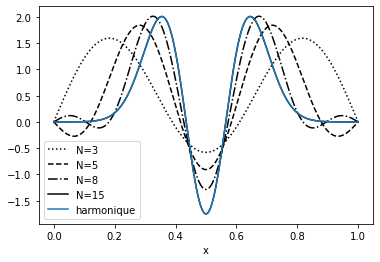

In [78]:
#A6.3
psi_oh_2= lambda x : (np.pi/(8*a**2)*R)**0.25*(np.pi**2*R*(x/a-.5)**2-1)*np.e**(-np.pi**2/4*R*(x/a-.5)**2)
vec_x=np.linspace(0,1,10000)
plt.plot(vec_x,-Psi(3,2)(vec_x),'k:',label='N=3')
plt.plot(vec_x,-Psi(5,2)(vec_x),'k--',label='N=5')
plt.plot(vec_x,Psi(8,2)(vec_x),'k-.',label='N=8')
plt.plot(vec_x,Psi(15,2)(vec_x),'k',label='N=15')
plt.plot(vec_x,psi_oh_2(vec_x),label='harmonique')
plt.legend()
plt.xlabel('x')